# Introduction to Portfolio Construction and Analysis with Python
EDHEC Business School  
https://www.coursera.org/learn/introduction-portfolio-construction-python

## Liabilities Hedging Portfolios (LHP)

- Institutional main concern is an unexpected increase in the present value of their liabilities
- Increase in PV of liabilities will lead to a decrease in the funding ratio which is bad news because it's going to lead to a decrease in the probability for the asset owner who meet their liabilities.
- LHP is also known as Goal Hedging Portfolios (GHP)
- LHP is an asset portfolio that behaves exactly like the liabilities that we are trying to immunize against or that we are trying to protect.
- The safe asset is the asset that is safe with respect to the investor and more precisely with respect to the specific goal of the investor.
- Safe portfolios are known as cashflow matching or duration matching bond portfolios that will take on the asset side to increase exactly in parallel to the increase of the liability value. 

## Liabilities Driven Investing
- Risk and Performance are 2 conflicting objectives that are best managed separately
- The modern investment paradigm known as liabilities driven investing states that investors should be holding 2 separate building blocks one delicated to performance and the other delicated to hedging
- It is an optimal asset allocation strategy for someone who's trying to maximize a risk return tradeoff, but not in terms of asset only but in terms of asset divided by liabilities, which is captured by this focus on maximizing expected utility of the funding ratio.  

- **performance-seeking portfolio** which will have a sole focus on performance and the focus of that portfolio should be maximum Sharpe Ratio maximization.
- **liability-hedging portfolio** which is to immunize the liability portfolios with respect to the underlying risk factors such as changes in interest rates.  The focus should be on liability risk hedging.
    

## Goal Hedging Portfolio (GHP aka LHP) Construction with Duration Matching

- to build a portfolio of regular coupon-paying bonds that have that same advantage, that match up with liabilities and go up and down in value relative to the liabilities when interest rates change.

In [1]:
import sys  
sys.path.append('../src') 
from edhec_risk_kit import *

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import edhec_risk_kit as erk

import matplotlib.pyplot as plt

DATA_FOLDER = '../data/'

%matplotlib inline

# %load_ext autoreload
# autoreload 2

In [2]:
erk.bond_cash_flows(3, 100, 0.03, 2)

1      1.5
2      1.5
3      1.5
4      1.5
5      1.5
6    101.5
dtype: float64

In [3]:
erk.bond_price(20, 1000, 0.05, 2, 0.04)

1136.7773962036904

## How regular paying bond prices change with interest rates
- Bond prices decreases with interest rates
- Not a good hedge because price changes with interest rates movements

In [4]:
rates = np.linspace(0.01, .10, num=20)
rates

array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ])

In [5]:
prices = [erk.bond_price(10, 1000, 0.05, 2, rate) for rate in rates]
prices

[1379.7483829333992,
 1326.7629283179222,
 1276.1632981372743,
 1227.833537616068,
 1181.6636507727876,
 1137.5492793724407,
 1095.3913999300185,
 1055.0960377089511,
 1016.5739967228162,
 979.7406048086303,
 944.5154728963505,
 910.8222676519945,
 878.5884967212596,
 847.74530584692,
 818.2272871767957,
 789.9722981198867,
 762.9212901465673,
 737.0181469646424,
 712.209531536784,
 688.4447414365]

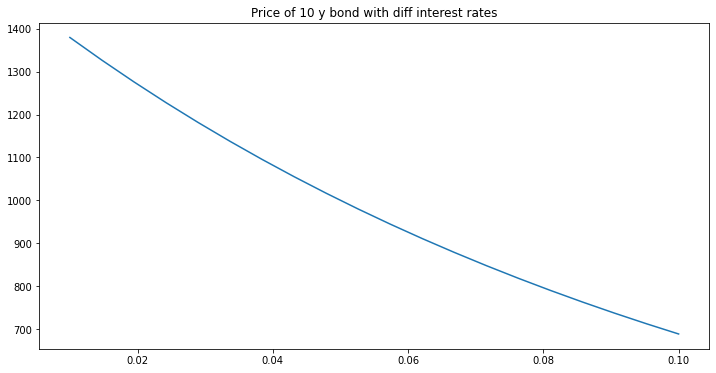

In [6]:
pd.DataFrame(data=prices, index=rates).plot(title="Price of 10 y bond with diff interest rates", 
                                            legend=False, figsize=(12,6))
plt.show()

Assume that we have a liability of \$1000 in 10 years. Clearly, we cannot use this as a hedge, since we would be severely underfunded if interest rates rise, and over funded if they fall. If we had a Zero Coupon bond, we could purchase that, but Zero Coupon bonds of specific maturities arent always available.

What is available are various bonds with maturities from 5 to 30 years. How do we build a portfolio that has the same sensitivity to interest rates as our liabilities do? If they both respond the same way to changes in interest rates, we can effectively obtain immunity to interest rate changes.

One way to do this is through _Duration Matching_. The duration of a bond measures its senstivity to interest rate changes. Therefore, we match the duration of the liabilities to the duration of the bond portfolio. As it happens, the duration of a bond which is computed as the weighted average time of the cash flows, weighted by the cash flows.

Thus the duration of a Zero Coupon bond is just the maturity, since there is a single cash flow at maturity.

## Calculating Macaulay Duration

In [7]:
cf = erk.bond_cash_flows(3,1000,0.06,2)

In [8]:
cf

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
6    1030.0
dtype: float64

In [9]:
discounts = erk.discount_2(cf.index, 0.06/2)
discounts

Float64Index([ 0.970873786407767, 0.9425959091337544, 0.9151416593531595,
              0.8884870479156888, 0.8626087843841639, 0.8374842566836542],
             dtype='float64')

In [10]:
dcf = discounts*cf
dcf

1     29.126214
2     28.277877
3     27.454250
4     26.654611
5     25.878264
6    862.608784
dtype: float64

In [11]:
weights = dcf/dcf.sum()

In [12]:
sum(cf.index*weights)

5.579707187194534

In [13]:
erk.macaulay_duration(erk.bond_cash_flows(3,1000,.06,2), 0.06/2)

5.579707187194534

## Duration Matching
To match the Macaulay duration of your bonds to the Macaulay duration of the liability so as to get two portfolios that have the same sensitivity, they change in the same way with changes in interest rate. 

### Duration of Liabilities

In [14]:
liabilities = pd.Series(data=[100000,100000], index=[10,12])
erk.macaulay_duration_2(liabilities, 0.04)

10.960799385088393

### Durations of 2 Bonds

In [15]:
md_10 = erk.macaulay_duration_2(erk.bond_cash_flows(10, 1000, 0.05, 1), .04)
md_20 = erk.macaulay_duration_2(erk.bond_cash_flows(20, 1000, 0.05, 1), .04)

In [16]:
md_10, md_20

(8.190898824083233, 13.544718122145921)

### Calculate the weights of the 2 Bonds that matches the liabilities duration

We need to hold a portfolio of these two bonds that has a combined target duration that matches the duration of the liability, which is given by the following expression, where $w_s$ is the weight in the short duration bond whcih has duration $d_s$ and the duration of the longer bond is $d_l$. We designate the targeted duration as $d_t$.

$$ w_s \times d_s + (1-w_s) \times d_l = d_t $$

rearranging gives:

$$ w_s = \frac{d_l -d_t}{d_l - d_s} $$


In [17]:
short_bond=erk.bond_cash_flows(10,1000, 0.05, 1)
long_bond=erk.bond_cash_flows(20,1000, 0.05, 1)
w_s = erk.match_durations(liabilities, short_bond, long_bond, .04)
print('Weight of the shorter bond: {:.2f}'.format(w_s))
print('Weight of the longer bond: {:.2f}'.format(1-w_s))

Weight of the shorter bond: 0.48
Weight of the longer bond: 0.52


### Cashflows from the portfolio of 2 bonds and calculating the duration

In [18]:
p_short = erk.bond_price(10, 1000, .05, 1, 0.04)
p_long = erk.bond_price(20, 1000, .05, 1, 0.04)
a_0 = 130000

p_flows = pd.concat([a_0*w_s*short_bond/p_short, a_0*(1-w_s)*long_bond/p_long])
erk.macaulay_duration_2(p_flows, 0.04)

10.960799385088393

### Calculate the funding ratio of the portfolio against the liabilites
- Note that the funding ratio of the duration matched bond portfolio is always greater than 1 across all interest rates

In [19]:
cfr = erk.funding_ratio_2(p_flows, liabilities, 0.04)
cfr

0.9998760012192478

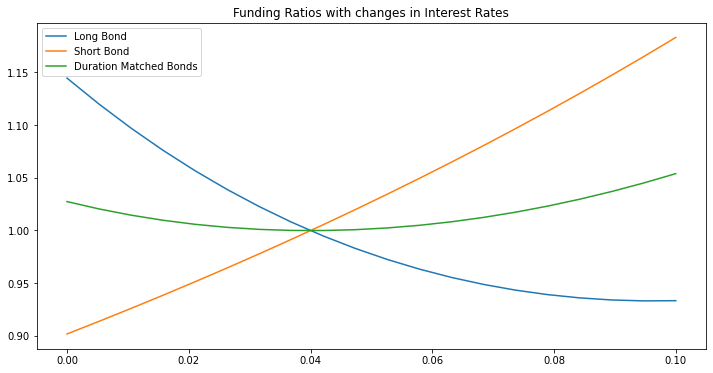

In [20]:
rates = np.linspace(0, 0.1, 20)

lb_assets = a_0*long_bond/p_long
sb_assets = a_0*short_bond/p_short

fr_change = pd.DataFrame({
    "Long Bond": [erk.funding_ratio_2(lb_assets, liabilities, r) for r in rates],
    "Short Bond": [erk.funding_ratio_2(sb_assets, liabilities, r) for r in rates],
    "Duration Matched Bonds": [erk.funding_ratio_2(p_flows, liabilities, r) for r in rates]
    
}, index = rates)

fr_change.plot(title='Funding Ratios with changes in Interest Rates', figsize=(12,6))
plt.show()

## Conclusion

We've seen that if you have the assets on hand, you can secure future liabilities by matching the duration of your liabilities with the durations of your assets to immunize yourself against level shifts in the yield curve. In practice, you might also want to protect against changes in the slope and curvature of the yield curve by using convexity hedging, but duration hedging is a simple but essential step towards ensuring that you will have the money to meet your liabilities when interest rates fluctuate.
